In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# The codecs module defines a set of base classes which define the interface. 
import codecs

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Pillow module from class lecture
from PIL import Image
from termcolor import colored

#to supress Warnings 
import warnings
warnings.filterwarnings("ignore")

#plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
import plotly.graph_objs as py

#watch size of data sets for git

# This will print out your data resources below
import os
print(os.listdir("resources"))

['beers.csv', 'breweries.csv', '.DS_Store', 'styleData.csv', 'images', 'open-beer-database.pdf', 'recipeData.csv', 'open-beer-database.csv', '.ipynb_checkpoints']


In [55]:
#converting files into datasets with pandas
beer = pd.read_csv("resources/beers.csv")
brewery = pd.read_csv("resources/breweries.csv")
with codecs.open("resources/recipeData.csv", "r",encoding='utf-8', errors='ignore') as xdata:
    brrecipe = pd.read_csv(xdata)
GlobalBeer = pd.read_csv("resources/beers.csv")

In [56]:
beer.head()


Unnamed: 0    abv  ibu    id                 name  \
0           0  0.050  NaN  1436             Pub Beer   
1           1  0.066  NaN  2265          Devil's Cup   
2           2  0.071  NaN  2264  Rise of the Phoenix   
3           3  0.090  NaN  2263             Sinister   
4           4  0.075  NaN  2262        Sex and Candy   

                            style  brewery_id  ounces  
0             American Pale Lager         408    12.0  
1         American Pale Ale (APA)         177    12.0  
2                    American IPA         177    12.0  
3  American Double / Imperial IPA         177    12.0  
4                    American IPA         177    12.0

Popular Beers

In [57]:
print(beer.groupby('name')["name"].count().sort_values(ascending=False).head(10),'green')

name
Nonstop Hef Hop             12
Dale's Pale Ale              6
Oktoberfest                  6
Longboard Island Lager       4
1327 Pod's ESB               3
Boston Lager                 3
Dagger Falls IPA             3
Narragansett Summer Ale      2
Brontide                     2
Mama's Little Yella Pils     2
Name: name, dtype: int64 green


Popular Breweries

In [58]:
print(brewery.groupby('name')["name"].count().sort_values(ascending=False).head(10))

name
Blackrocks Brewery         2
Sly Fox Brewing Company    2
Blue Mountain Brewery      2
Otter Creek Brewing        2
Summit Brewing Company     2
Oskar Blues Brewery        2
Lucette Brewing Company    2
Wynkoop Brewing Company    1
Everybody's Brewing        1
Fargo Brewing Company      1
Name: name, dtype: int64


Popular Beer Styles

In [59]:
print(beer.groupby('style')["name"].count().sort_values(ascending=False).head(10))

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: name, dtype: int64


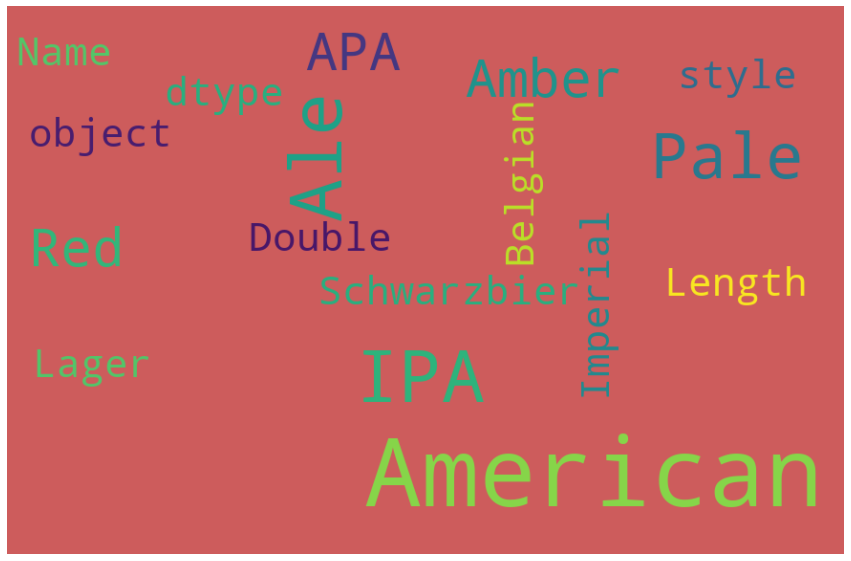

In [60]:
#word cloud - Visualizing  Beer Style  
wave_masknew = np.array(Image.open( "resources/images/Carlsberg.jpg"))
wordcloud = (WordCloud( max_font_size=100, min_font_size=8,mask = wave_masknew, stopwords=stopwords,background_color='#CD5C5C').generate(str(beer['style'])))
fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
print(brewery.groupby('city')["city"].count().sort_values(ascending=False).head(10))

city
Portland         17
Boulder           9
Seattle           9
Chicago           9
Austin            8
Denver            8
San Diego         8
Bend              6
San Francisco     5
Columbus          4
Name: city, dtype: int64


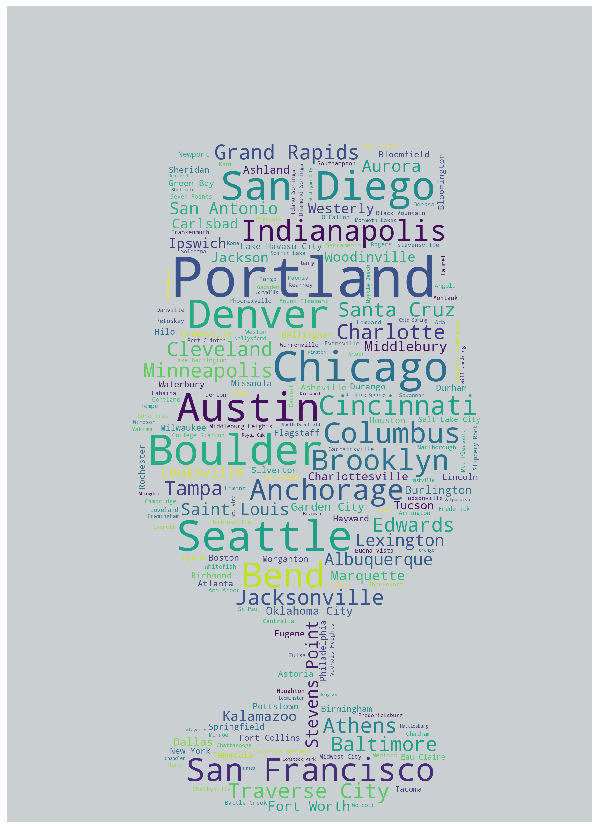

In [62]:
#word cloud - Popular Cities (top 50)
wave_mask3 = np.array(Image.open( "resources/images/beer-glass.jpg"))
wordcloud = (WordCloud( max_words = 200,stopwords=stopwords, mask = wave_mask3, background_color='#CACFD2',margin=10).generate_from_frequencies(brewery['city'].value_counts()))
fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [63]:
brewery.groupby('state')['state'].count().sort_values(ascending=False).head(10)

state
 CO    47
 CA    39
 MI    32
 OR    29
 TX    28
 PA    25
 MA    23
 WA    23
 IN    22
 WI    20
Name: state, dtype: int64

Most common alcohol content found in Beer.  Top 10.  

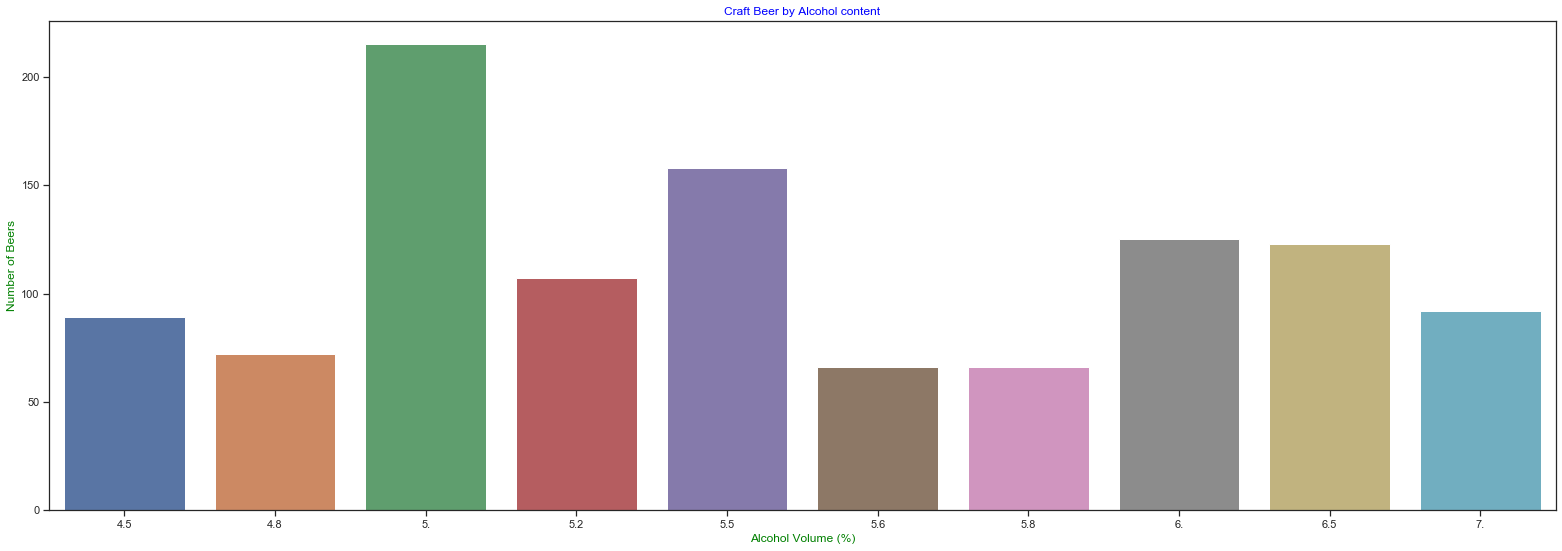

In [64]:
temp = beer.groupby('abv')["name"].count().sort_values(ascending=False).head(10)

#Craft Beers Alcohol content
x = list(temp.index.values)
for i in range(len(x)):
    x[i] = np.format_float_positional(np.float16(x[i]*100))
y = temp.values

fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 27
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
sns.barplot(x,y)
plt.xlabel("Alcohol Volume (%)",color='green')
plt.ylabel("Number of Beers",color='green')
plt.title("Craft Beer by Alcohol content", color='blue')
plt.show()


Linear Regression of Alchohol Content vs. Bitterness

Text(0.5, 1, 'Bitterness vs Alcohol Content ')

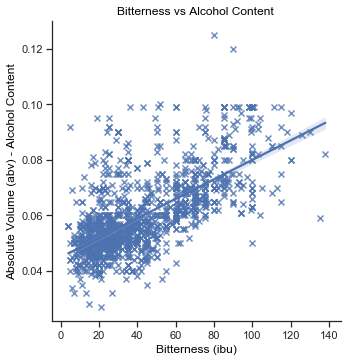

In [65]:
beertemp = beer
beertemp.dropna(inplace=True)
sns.lmplot("ibu","abv", data=beertemp,markers="x")
plt.xlabel("Bitterness (ibu)",color='black')
plt.ylabel("Absolute Volume (abv) - Alcohol Content",color='black')
plt.title("Bitterness vs Alcohol Content ", color='black')

Boxplot Data Display of Beer Alcohol Content

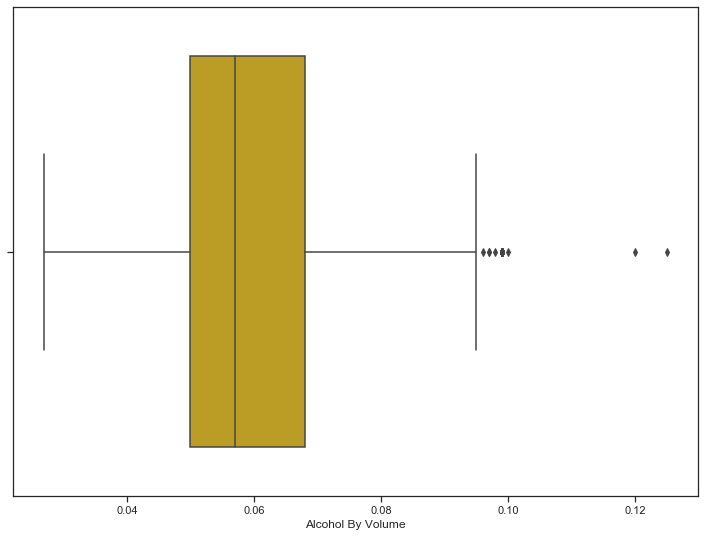

In [66]:


plt.subplot(1, 2, 2)
sns.boxplot(beertemp["abv"],color='#D4AC0D')
plt.xlabel("Alcohol By Volume")

plt.show()


Seaborn line plot showing brew method

Brew in a bag, commonly referred to as BIAB amongst the homebrewing community, is a form of all-grain brewing that eliminates the need for a separate mash tun and allows a brewer to conduct the entire brewing process in one kettle.

Extract brewing is the form of brewing used by most new brewers. Extract brewing involves the use of concentrated Malt Extract in the brewing process. The use of malt extract lets the brewer skip the mashing process, and move directly to the boil and fermentation steps.

<Figure size 2160x2160 with 0 Axes>

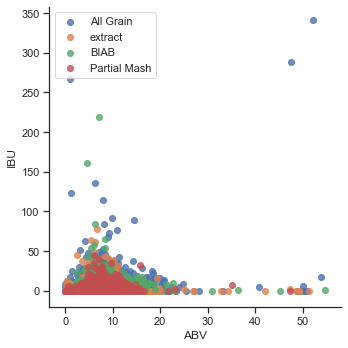

In [67]:


brtemp = brrecipe.fillna(0)
brtemp["IBU"]=brtemp["IBU"]/10
plt.figure(figsize=(30 ,30))
sns.lmplot( x="ABV",y="IBU",  data=brtemp, fit_reg=False, hue='BrewMethod', legend=False)
plt.legend(loc='upper left')

plt.show()

Beer factor production heatmap

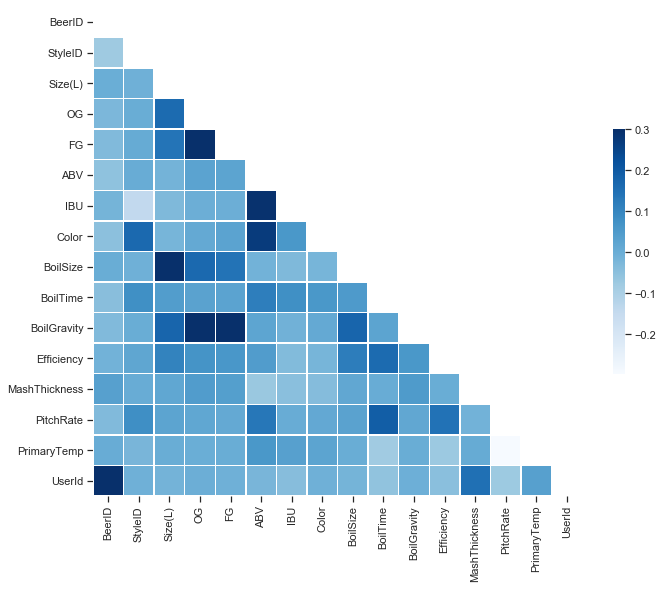

In [68]:
#how does different factor in Beer Production correlate with each other 
# Compute the correlation matrix
corr = brrecipe.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

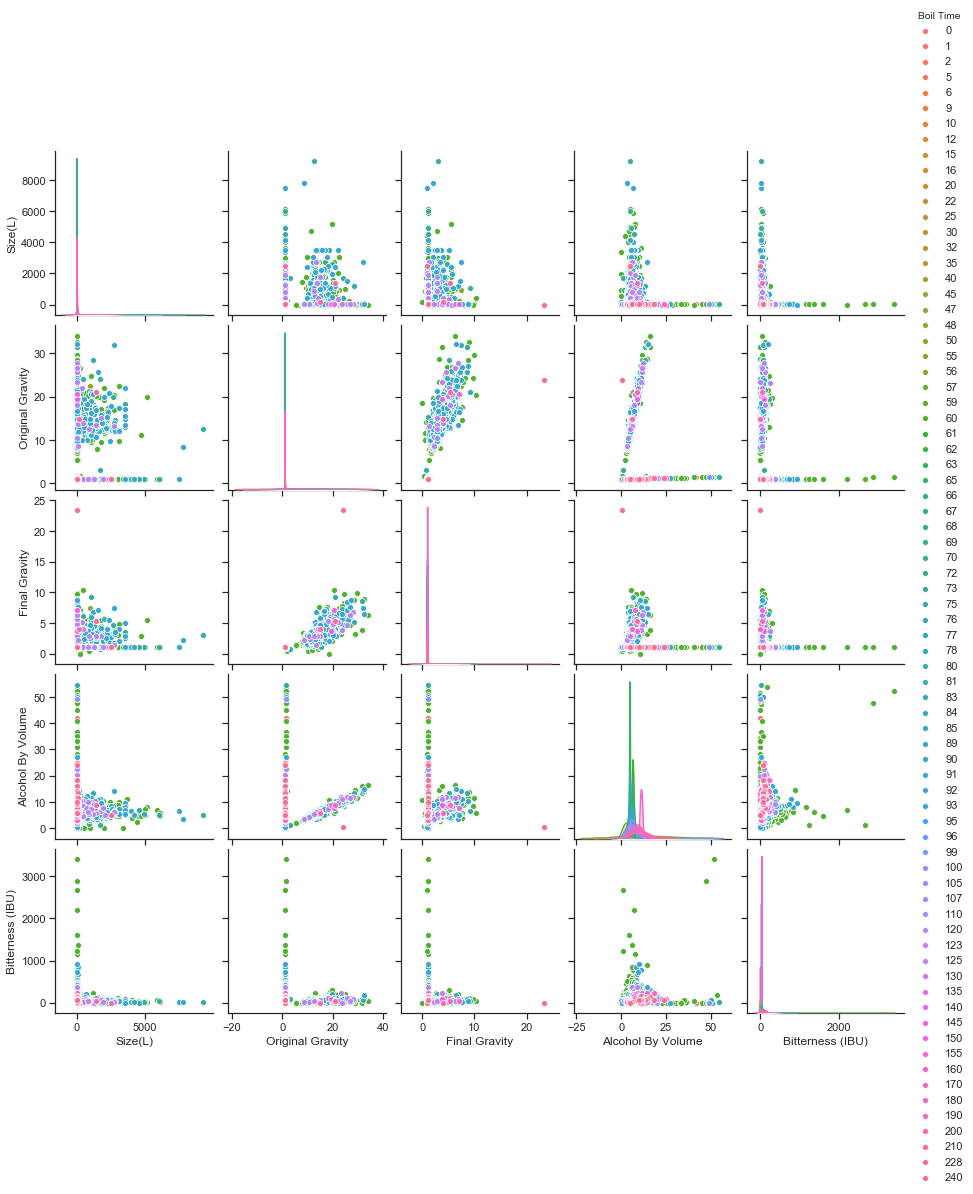

In [69]:

#Data Prep for PairPlot
brr = brrecipe.iloc[:,5:10]
brr["Boil Time"] = brrecipe["BoilTime"]
brr = brr.rename(columns={"OG": "Original Gravity", "FG": "Final Gravity", "ABV":"Alcohol By Volume", "IBU":"Bitterness (IBU)"})
brr.fillna(0,inplace=True)

#plot Prep 
sns.set(style="ticks", color_codes=True)
sns.pairplot(brr, hue = 'Boil Time', palette = 'husl')